In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
Data=pd.read_csv(r"C:\Users\ggomare\Downloads\Data (1).csv")

In [6]:
Data.head(4)

,Cost,Quality,Lead time,Service Level,Availability,Green Packing aqnd Labeling,Selected Supplier
0,18.00,0.99,8,0.96,0.95,0,1
1,18.43,1.00,9,0.98,0.91,0,1
2,19.87,0.94,10,0.93,0.96,1,0
3,17.25,0.99,7,0.97,0.89,0,1


In [7]:
Data_x=Data.drop(columns=["Selected Supplier"])

In [8]:
Data_x

,Cost,Quality,Lead time,Service Level,Availability,Green Packing aqnd Labeling
0,18.00,0.99,8,0.96,0.95,0
1,18.43,1.00,9,0.98,0.91,0
2,19.87,0.94,10,0.93,0.96,1
3,17.25,0.99,7,0.97,0.89,0
4,18.22,1.00,9,0.94,0.88,1
...,...,...,...,...,...,...
61,20.85,0.91,11,0.94,0.95,0
62,18.10,0.98,10,0.99,0.93,1
63,21.20,0.91,12,0.90,0.94,1
64,22.12,0.90,11,0.89,0.92,0


In [9]:
Data_y=Data["Selected Supplier"]

In [10]:
Data_y

0     1
1     1
2     0
3     1
4     0
     ..
61    1
62    0
63    0
64    0
65    0
Name: Selected Supplier, Length: 66, dtype: int64

In [11]:
Xtrain, Xtest, Ytrain, Ytest=train_test_split(Data_x,Data_y,test_size=0.2,random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler 
 
scaler = StandardScaler() 
# Fit only on X_train 
scaler.fit(Xtrain) 
 
# Scale both X_train and X_test 
Xtrain = scaler.transform(Xtrain) 
Xtest = scaler.transform(Xtest)

In [13]:
model1=DecisionTreeClassifier(criterion="gini",max_depth=4)

In [19]:
model1.fit(Xtrain,Ytrain)

DecisionTreeClassifier(max_depth=4)

In [21]:
model1.score(Xtest,Ytest)

0.9285714285714286

In [24]:
pred=model1.predict(Xtest)

In [25]:
pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [22]:
model1.score(Xtrain,Ytrain)

1.0

In [26]:
confusion_matrix(pred,Ytest)

array([[10,  0],
       [ 1,  3]], dtype=int64)

In [27]:
print(classification_report(pred,Ytest))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.75      0.86         4

    accuracy                           0.93        14
   macro avg       0.95      0.88      0.90        14
weighted avg       0.94      0.93      0.93        14



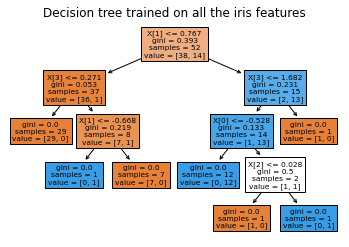

In [29]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
plt.figure()
plot_tree(model1, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

# Random Forest

In [30]:
rfc=RandomForestClassifier(n_estimators=100)

In [31]:
rfc.fit(Xtrain,Ytrain)

RandomForestClassifier()

In [32]:
pred1=rfc.predict(Xtest)

In [33]:
pred1

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [34]:
rfc.score(Xtrain,Ytrain)

1.0

In [35]:
rfc.score(Xtest,Ytest)

0.9285714285714286

In [37]:
confusion_matrix(pred1,Ytest)

array([[10,  0],
       [ 1,  3]], dtype=int64)

In [38]:
print(classification_report(pred1,Ytest))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.75      0.86         4

    accuracy                           0.93        14
   macro avg       0.95      0.88      0.90        14
weighted avg       0.94      0.93      0.93        14



# LogisticRegression

In [39]:
from sklearn.linear_model import LogisticRegression

In [54]:
model3=LogisticRegression(random_state=1,solver='sag',multi_class='multinomial')

In [55]:
model3.fit(Xtrain,Ytrain)

LogisticRegression(multi_class='multinomial', random_state=1, solver='sag')

In [56]:
pred3=model3.predict(Xtest)

In [57]:
pred3

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [58]:
model3.score(Xtest,Ytest)

0.8571428571428571

In [59]:
confusion_matrix(Ytest,pred3)

array([[10,  1],
       [ 1,  2]], dtype=int64)

In [61]:
print(classification_report(pred3,Ytest))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.67      0.67      0.67         3

    accuracy                           0.86        14
   macro avg       0.79      0.79      0.79        14
weighted avg       0.86      0.86      0.86        14



In [77]:
import warnings
warnings.filterwarnings("ignore")
model1.fit(Xtrain,Ytrain)
rfc.fit(Xtrain,Ytrain)
model3.fit(Xtrain,Ytrain)

LogisticRegression(multi_class='multinomial', random_state=1, solver='sag')

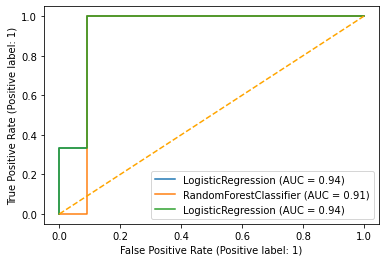

In [78]:
from sklearn.metrics import plot_roc_curve, roc_curve, auc
disp=plot_roc_curve(model1, Xtest, Ytest) 
# plot_roc_curve(model1, Xtest, Ytest, ax=disp.ax_) 
plot_roc_curve(rfc, Xtest, Ytest, ax=disp.ax_) 
plot_roc_curve(model3, Xtest, Ytest, ax=disp.ax_)
plt.plot([0,1], [0,1], color='orange', linestyle='--')

In [65]:
rf=RandomForestClassifier(random_state=1, n_estimators=100) 

In [66]:
rf.fit(Xtrain,Ytrain) 

RandomForestClassifier(random_state=1)

In [67]:
rf.feature_importances_

array([0.2912697 , 0.36708162, 0.15562499, 0.13118088, 0.03767203,
       0.01717078])

In [73]:
df2=pd.DataFrame({ 
    "Importance": [0.2912697 , 0.36708162, 0.15562499, 0.13118088, 0.03767203,
       0.01717078],"features": ['Cost','Quality','Lead time','Service Level','Availability','Green Packing aqnd Labeling']})

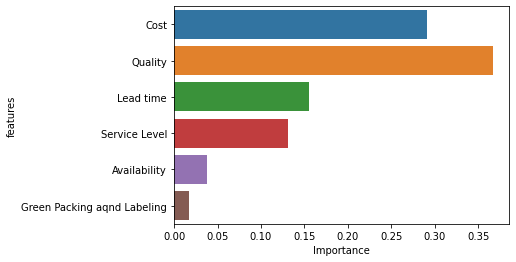

In [74]:
sns.barplot(data=df2, y="features", x="Importance"); 